#Importation des Bibliothéques


In [90]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier


# Importation du Dataset 





In [6]:
data=pd.read_csv('heart (5).csv')

In [7]:
data 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Data cleaning 


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [32]:
data.shape # number of rows and columns in the dataset


(303, 14)

In [34]:
data['target'].value_counts() #  distribution of Target Variable


1    165
0    138
Name: target, dtype: int64

In [35]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [36]:
data.isnull().sum().sum()

0

# Data visualization 

In [40]:
countnothave = len(data[data.target == 0])
counthave = len(data[data.target == 1])

print("Percentage of Patients have Heart Disease: {:.2f}%".format(round((float(counthave) / len(data.target)) *100)))
print("Percentage of Patients have not Heart Disease: {:.2f}%".format(round((float(countnothave) / len(data.target)) *100)))


Percentage of Patients have Heart Disease: 54.00%
Percentage of Patients have not Heart Disease: 46.00%


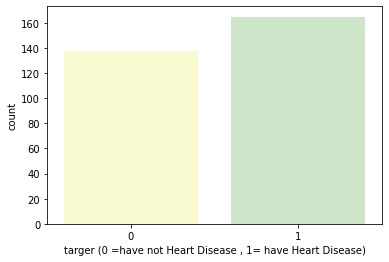

In [39]:
sns.countplot(x='target', data=data, palette='Pastel1_r')
plt.xlabel("targer (0 =have not Heart Disease , 1= have Heart Disease)")
plt.show()

In [28]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])

print("Percentage of Female Patients: {:.2f}%".format(round((float(countFemale) / len(data.sex)) *100)))
print("Percentage of Male Patients: {:.2f}%".format(round((float(countMale) / len(data.sex)) *100)))

Percentage of Female Patients: 32.00%
Percentage of Male Patients: 68.00%


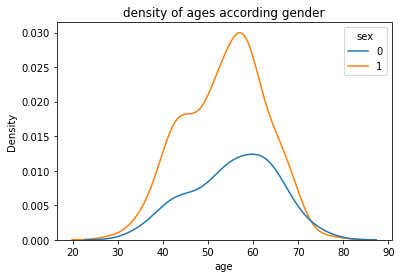

In [43]:
sns.kdeplot(data = data , x ="age" , hue ="sex" )
plt.title("density of ages according gender")
plt.show()

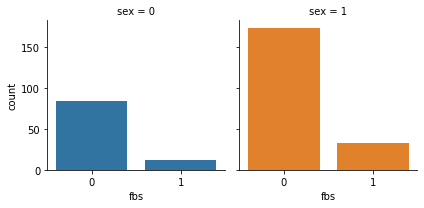

In [46]:
g = sns.FacetGrid(data, col='sex', hue='sex')
g.map(sns.countplot, 'fbs', order=data['fbs'].value_counts().index);

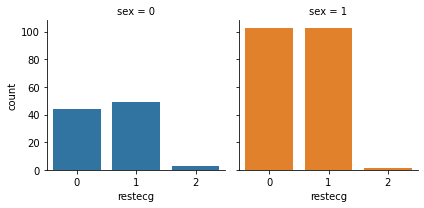

In [47]:
g = sns.FacetGrid(data, col='sex', hue='sex')
g.map(sns.countplot, 'restecg', order=data['restecg'].value_counts().index.sort_values());

#Spliting the Data 


In [69]:
y = data.target.values
x_data = data.drop(['target'], axis = 1)

In [72]:
print(x_data)


     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0     63    1   3       145   233  ...      0      2.3      0   0     1
1     37    1   2       130   250  ...      0      3.5      0   0     2
2     41    0   1       130   204  ...      0      1.4      2   0     2
3     56    1   1       120   236  ...      0      0.8      2   0     2
4     57    0   0       120   354  ...      1      0.6      2   0     2
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
298   57    0   0       140   241  ...      1      0.2      1   0     3
299   45    1   3       110   264  ...      0      1.2      1   0     3
300   68    1   0       144   193  ...      0      3.4      1   2     3
301   57    1   0       130   131  ...      1      1.2      1   1     3
302   57    0   1       130   236  ...      0      0.0      1   1     2

[303 rows x 13 columns]


In [73]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [80]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

## LOGISTIC REGRESSION 


In [81]:
logreg = LogisticRegression()   


In [83]:
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
y_pred  = logreg.predict(x_test)    


In [85]:
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.84


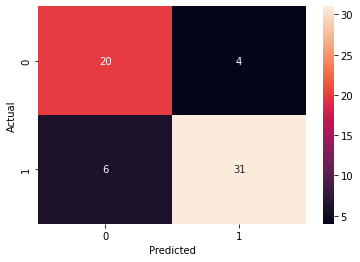

In [86]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

KNN

In [87]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5) #best n_neighbors=5

#Train the model using the training sets
knn.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(x_test)

In [88]:
# accuracy
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7868852459016393


#DECISION TREE

In [91]:
#applying tree algorithm
dtree = tree.DecisionTreeClassifier()  
dtree.fit(x_train, y_train)   #fitting our model
y_pred=dtree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7540983606557377


#BEST MODEL: LOGISTIC REGRESSION 
